In [4]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

<Axes: >

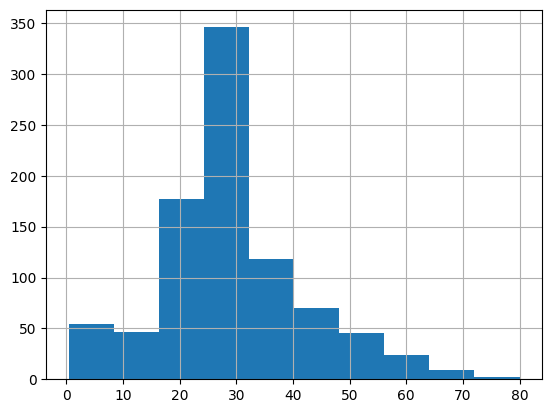

In [6]:
# 나이에 따른 hist
df['age'].hist()


In [8]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].median(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'] = df['age'].fillna(mean_age)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [11]:
df = sns.load_dataset('titanic')
# 객실별 성별에 다른 평균값으로 해당 결측치를 대ㅐ처
df.groupby(['sex','pclass'])['age'].transform('mean')

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: age, Length: 891, dtype: float64

In [ ]:
#평균과 vs 중위수  ... 어떤 기준으로 선택 

# 평균
 #이상치의 기준이 낮을 때 

# 중위수 
 # 이상치의 비중이 높을 때 

# 결측치가 많을때 .. (50%이상)
# 머신러닝 이나 딥러닝 기반의 보간 고련/... 
import matplotlib as pd


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

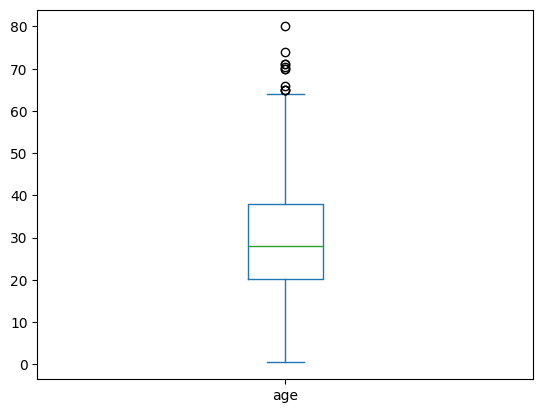

In [ ]:

q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower = q1 - iqr
upper = q3 + iqr
outlier_mask =  (df['age'] >= lower)& (df['age'] <= upper)
df[outlier_mask]['age'].plot(kind= 'box')

In [ ]:
# 델타 = 상대적평균 - 중앙값의 차이
# real_diff = abs(mean-median) / (abs(median)) + 1e - 8
#평균이 중앙값에 얼마나 떨어져 잇는지를 상대적으로 본 값이 크면 분포가 치우쳐있거나 또는 outer(이상치)평균을 끌어당긴다.

# 쎄타 : 이상치 비율(IQR 기준)
# IQR = Q3-Q1 이상치 = Q1-1.5QR ~ Q3 + 1.5IQR)
# 관측치중 IQR 기준으로 이상치에 해당하는 값이 차지하는 비율 크면 평균이 불안정

# red_diff < 델타 and outlier_frac < 세타 :
# mean
# else
# median

#델타와 세타에 해당하는 값은 
# 보수적(이상치에 민감) 델타는 0.05(5%) 세타 0.01(%)
# 보통 추천 0.08~0.10 0.02~0.03


In [19]:
print(1e2)
print(1e-2)

100.0
0.01


In [20]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['age'])
mean =   titanic['age'].mean()
midean = titanic['age'].median()
# 상대 차이
rel_diff = abs(mean-midean) / abs(midean)+1e-8
# 이상치 비율 계산 이상치개수 / 전체개수
# q1-1.5iqr ~ q3+1.5iqr
q1 = titanic['age'].quantile(0.25)
q3 = titanic['age'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
outlier_frac = ((titanic['age']<lower) | (titanic['age'] > upper)).mean()
delta ,setha = 0.08,0.02
if rel_diff < delta and outlier_frac < setha:
    print('mean')
else:
    print('median')


mean
